In [ ]:
'''
 * Copyright (c) 2016 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# Classification with Support Vector Machines (SVMs)

In many situations, we want our machine learning algorithm to predict one of several discrete outcomes. Examples include:
- An email client classifying messages into spam or personal mail.
- A telescope identifying celestial objects as galaxies, stars, or planets.

In this chapter, we focus on the **binary classification** case, where the set of possible labels is:

$$
\{+1, -1\}
$$

We define a predictor function:

$$
f: \mathbb{R}^D \rightarrow \{+1, -1\} \tag{12.1}
$$

Each example $x_n \in \mathbb{R}^D$ is a feature vector, and the corresponding label $y_n \in \{+1, -1\}$.

---

## Support Vector Machines (SVM)

Support Vector Machines solve binary classification by learning a function that separates the two classes. Given training data:

$$
\{(x_1, y_1), \dots, (x_N, y_N)\}
$$

we estimate a model that minimizes classification error. SVM assumes a **linear model** in a transformed space $\phi(x)$:

$$
f(x) = w^\top \phi(x) + b
$$

This transformation $\phi$ may be nonlinear and is typically defined implicitly via kernels (discussed in Section 12.4).

---

## Why SVM?

1. **Geometric Viewpoint**: SVM reasoning is grounded in geometry—projections, inner products, margins.
2. **Optimization-Based**: SVM solves a convex optimization problem that has no closed-form solution, requiring numerical solvers.

---

## Binary Classification via Hyperplanes

A **hyperplane** in $\mathbb{R}^D$ is a $(D-1)$-dimensional affine subspace. In 2D, it's a straight line. We seek a hyperplane that separates the classes:

$$
w^\top x + b = 0
$$

The classification function is:

$$
f(x) = \text{sign}(w^\top x + b)
$$

where:
- $w$ is the weight vector (normal to the hyperplane)
- $b$ is the bias/offset

---

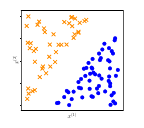

Fig.1 Example 2D data, illustrating the intuition of data where we can find a linear classifier that separates orange crosses from blue discs.

## Margin

The **margin** is the distance between the hyperplane and the closest data point. SVM maximizes this margin while minimizing classification error.

We will formalize this in:
- **Geometric View**: Section 12.2.4
- **Loss Function View**: Section 12.2.5

and derive the **dual problem** using Lagrange multipliers (Section 7.2). The dual formulation reveals another viewpoint: SVM as an optimization over the **convex hulls** of each class (Section 12.3.2).

---

## Nonlinear SVMs and Kernels

By using a **kernel function** $K(x, x')$, we define inner products in a high-dimensional space without explicitly computing $\phi(x)$. This allows SVMs to handle **nonlinear decision boundaries** efficiently.

---

## Relation to Maximum Likelihood

- In **maximum likelihood** approaches (e.g., logistic regression), we define a probabilistic model and derive an optimization problem.
- In **SVM**, we define an optimization objective directly, motivated by geometry and **empirical risk minimization**.

---

## Model Selection and Practical Issues

- The number of components $K$ in a GMM or the penalty parameter in an SVM is often unknown and must be selected using **cross-validation**.
- SVMs can suffer from **overfitting** if improperly tuned, just like other models.

---

## Summary

SVMs:
- Solve binary classification via geometric separation.
- Optimize a margin-based objective.
- Extend to nonlinear classification using kernels.
- Are supported by strong theoretical guarantees and practical performance.

We will next explore:
- **Loss-based formulation**
- **Dual problem and kernels**
- **Practical training of nonlinear SVMs**


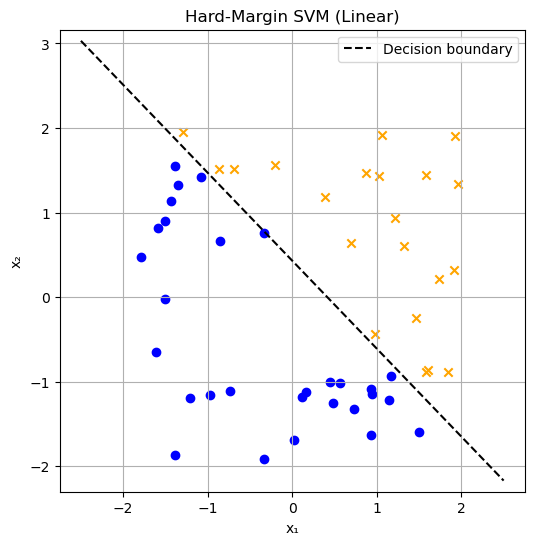

In [1]:
import random
import matplotlib.pyplot as plt

# Generate synthetic 2D linearly separable data
def generate_data(n=50):
    X = []
    y = []
    for _ in range(n):
        x1, x2 = random.uniform(-2, 2), random.uniform(-2, 2)
        label = 1 if x1 + x2 > 0.5 else -1
        X.append([x1, x2])
        y.append(label)
    return X, y

# Compute dot product
def dot(w, x):
    return sum(wi * xi for wi, xi in zip(w, x))

# Compute gradient of SVM hinge loss
def compute_gradient(X, y, w, b, lr):
    dw = [0] * len(w)
    db = 0
    for xi, yi in zip(X, y):
        margin = yi * (dot(w, xi) + b)
        if margin < 1:
            for j in range(len(w)):
                dw[j] += -yi * xi[j]
            db += -yi
    return [lr * dwi / len(X) for dwi in dw], lr * db / len(X)

# SVM training using batch gradient descent
def train_svm(X, y, lr=0.1, epochs=1000):
    w = [0.0, 0.0]
    b = 0.0
    for _ in range(epochs):
        grad_w, grad_b = compute_gradient(X, y, w, b, lr)
        w = [w[j] - grad_w[j] for j in range(2)]
        b -= grad_b
    return w, b

# Prediction function
def predict(w, b, x):
    return 1 if dot(w, x) + b >= 0 else -1

# Plot decision boundary and data
def plot_svm(X, y, w, b):
    x_min, x_max = -2.5, 2.5
    x_vals = [x_min, x_max]
    y_vals = [(-w[0] * x - b) / w[1] for x in x_vals]

    plt.figure(figsize=(6, 6))
    for xi, yi in zip(X, y):
        plt.scatter(*xi, c='orange' if yi == 1 else 'blue', marker='x' if yi == 1 else 'o')
    plt.plot(x_vals, y_vals, 'k--', label="Decision boundary")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.title("Hard-Margin SVM (Linear)")
    plt.grid(True)
    plt.legend()
    plt.axis("equal")
    plt.show()

# Run the full pipeline
X, y = generate_data()
w, b = train_svm(X, y)
plot_svm(X, y, w, b)


# 12.1 Separating Hyperplanes

Given two examples represented as vectors $x_i$ and $x_j$, one way to compute the similarity between them is using the **inner product**:

$$
\langle x_i, x_j \rangle
$$

Inner products are related to the **angle between vectors**, and depend on vector norms. They define geometric notions such as **orthogonality** and **projections**.

---

## Binary Classification and Partitioning

In binary classification, we wish to split $\mathbb{R}^D$ into two regions such that:

- Positive examples are on one side
- Negative examples are on the other

We use a **hyperplane** to achieve this.

Let $x \in \mathbb{R}^D$ and define a function:

$$
f : \mathbb{R}^D \to \mathbb{R} \tag{12.2a}
$$

$$
f(x) := \langle w, x \rangle + b \tag{12.2b}
$$

where:
- $w \in \mathbb{R}^D$ is a weight vector (normal to the hyperplane)
- $b \in \mathbb{R}$ is a bias/intercept

We define the separating hyperplane as:

$$
\{x \in \mathbb{R}^D : f(x) = 0\} \tag{12.3}
$$

---

## Why is $w$ Orthogonal to the Hyperplane?

Let $x_a, x_b$ lie on the hyperplane. Then:

$$
f(x_a) = f(x_b) = 0
$$

Subtracting:

$$
f(x_a) - f(x_b) = \langle w, x_a \rangle + b - (\langle w, x_b \rangle + b) = \langle w, x_a - x_b \rangle \tag{12.4}
$$

This implies $w \perp (x_a - x_b)$.

Hence, **$w$ is normal to the hyperplane**.

---

## Classification Rule

Given a new input $x_{\text{test}}$, classify it as:

- **$+1$ if $f(x_{\text{test}}) \geq 0$**
- **$-1$ otherwise**

This means that positive examples lie "above" the hyperplane and negative ones lie "below".

To enforce correctness on training data, we require:

If $y_n = +1$, then:

$$
\langle w, x_n \rangle + b \geq 0 \tag{12.5}
$$

If $y_n = -1$, then:

$$
\langle w, x_n \rangle + b < 0 \tag{12.6}
$$

These can be combined into a single condition:

$$
y_n(\langle w, x_n \rangle + b) \geq 0 \tag{12.7}
$$

which is valid for all $n = 1, \dots, N$.

---

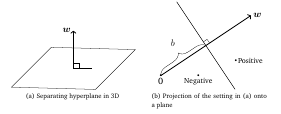

Fig.2 Equation of a separating hyperplane (12.3). (a) The standard way of representing the equation in 3D. (b) For ease of drawing, we look at the hyperplane edge on.

## Visual Intuition

A hyperplane partitions the space into **positive and negative regions** based on the **sign of $f(x)$**. The decision boundary $f(x) = 0$ defines the geometric separator.

This geometric framework forms the basis for linear classifiers such as **Support Vector Machines (SVMs)**.

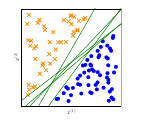

Fig.3 Possible separating hyperplanes. There are many linear classifiers (green lines) that separate orange crosses from blue discs.


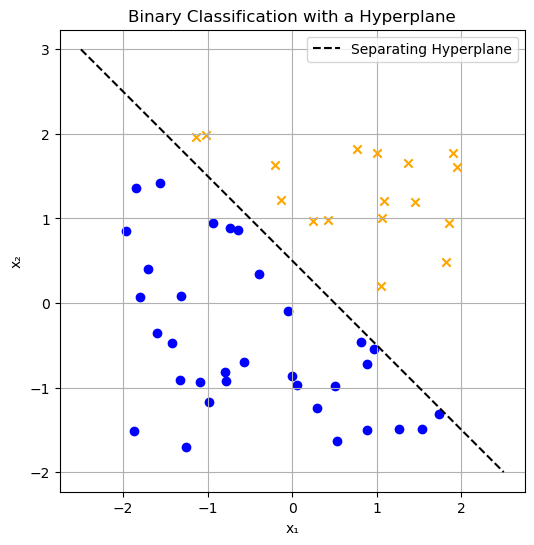

In [2]:
import random
import matplotlib.pyplot as plt

# Generate separable 2D data
def generate_linear_data(n=50):
    X = []
    y = []
    for _ in range(n):
        x1 = random.uniform(-2, 2)
        x2 = random.uniform(-2, 2)
        label = 1 if x1 + x2 > 0.5 else -1
        X.append([x1, x2])
        y.append(label)
    return X, y

# Compute dot product
def dot(a, b):
    return sum(i * j for i, j in zip(a, b))

# Predict using separating hyperplane
def predict(w, b, x):
    return 1 if dot(w, x) + b >= 0 else -1

# Plot data and hyperplane
def plot_hyperplane(X, y, w, b):
    plt.figure(figsize=(6, 6))

    for xi, yi in zip(X, y):
        plt.scatter(*xi, c='orange' if yi == 1 else 'blue', marker='x' if yi == 1 else 'o')

    x_vals = [-2.5, 2.5]
    y_vals = [(-w[0] * x - b) / w[1] for x in x_vals]
    plt.plot(x_vals, y_vals, 'k--', label='Separating Hyperplane')

    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.title("Binary Classification with a Hyperplane")
    plt.grid(True)
    plt.axis("equal")
    plt.legend()
    plt.show()

# Example usage
X, y = generate_linear_data()
w = [1.0, 1.0]  # Normal vector to hyperplane
b = -0.5        # Bias term
plot_hyperplane(X, y, w, b)


## Primal Support Vector Machine

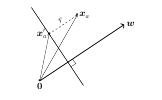
Figure 12.4 Vector addition to express distance to hyperplane: w xa = x′a + r ∥w∥ .

Given a dataset:

$$
\{(x_1, y_1), \dots, (x_N, y_N)\} \quad \text{with} \quad x_n \in \mathbb{R}^D, \; y_n \in \{+1, -1\}
$$

that is linearly separable, there are infinitely many hyperplanes that classify the data perfectly. The **support vector machine** chooses the one that maximizes the **margin** between the positive and negative classes.

---

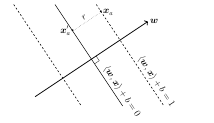
Fig.5 Derivation of the 1 margin: r = ∥w∥ .

##  Concept of the Margin

The **margin** is defined as the minimum distance between any training point and the separating hyperplane.

A hyperplane in $ \mathbb{R}^D $ can be defined as:

$$
f(x) = \langle w, x \rangle + b = 0
$$

Let $x_a$ be a data point on the **positive side**, i.e.,

$$
\langle w, x_a \rangle + b > 0
$$

To compute the distance $r$ of $x_a$ from the hyperplane, we project it orthogonally onto the hyperplane:

$$
x_a = x_a' + \frac{r}{\|w\|} w \tag{12.8}
$$

If $w$ is normalized such that $\|w\| = 1$, then $r$ equals the distance from $x_a$ to the hyperplane.

---

### Constraint Reformulation

To ensure correct classification and a margin of at least $r$, we require:

$$
y_n (\langle w, x_n \rangle + b) \geq r \tag{12.9}
$$

We also enforce:

- $\|w\| = 1$ to fix the scale of $w$
- $r > 0$ as the margin must be positive

---

## Primal SVM Optimization Problem

We now define the **primal SVM optimization** problem:

$$
\begin{aligned}
& \max_{w, b, r} && r \\
& \text{subject to} \\
& && y_n (\langle w, x_n \rangle + b) \geq r \quad \text{for all } n = 1, \dots, N \\
& && \|w\| = 1 \\
& && r > 0 \\
\end{aligned} \tag{12.10}
$$

---

## Remarks

- The margin is fundamental for **generalization** in machine learning.
- A larger margin implies lower **model complexity** and better generalization bounds.
- The SVM seeks a balance between fitting the data and controlling complexity.

---

*In the next section, we'll transform this constrained max-margin problem into a more convenient convex optimization problem by rescaling the constraints.*


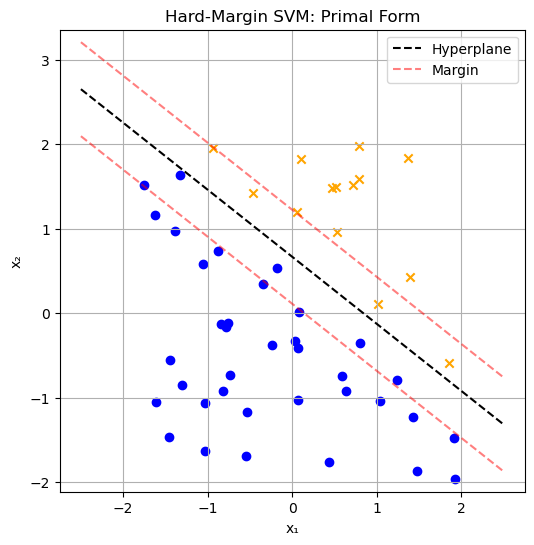

In [3]:
import random
import math
import matplotlib.pyplot as plt

# Generate linearly separable 2D data
def generate_data(n=50):
    X, y = [], []
    for _ in range(n):
        x1 = random.uniform(-2, 2)
        x2 = random.uniform(-2, 2)
        label = 1 if x1 + x2 > 0.5 else -1
        X.append([x1, x2])
        y.append(label)
    return X, y

# Dot product of two vectors
def dot(a, b):
    return sum(ai * bi for ai, bi in zip(a, b))

# Vector norm
def norm(v):
    return math.sqrt(dot(v, v))

# Update step for hard-margin SVM
def svm_train(X, y, lr=0.01, epochs=1000):
    w = [0.0, 0.0]
    b = 0.0
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            margin = yi * (dot(w, xi) + b)
            if margin < 1:
                # Misclassified or on margin
                w = [wi + lr * (yi * xi[j] - 2 * 0.01 * wi) for j, wi in enumerate(w)]
                b += lr * yi
            else:
                # Correct side, apply regularization only
                w = [wi - lr * 2 * 0.01 * wi for wi in w]
    return w, b

# Predict using learned hyperplane
def predict(w, b, x):
    return 1 if dot(w, x) + b >= 0 else -1

# Plot data and decision boundary
def plot_data(X, y, w, b):
    plt.figure(figsize=(6, 6))
    for xi, yi in zip(X, y):
        plt.scatter(xi[0], xi[1], c='orange' if yi == 1 else 'blue', marker='x' if yi == 1 else 'o')

    # Decision boundary
    x_vals = [-2.5, 2.5]
    y_vals = [(-w[0] * x - b) / w[1] for x in x_vals]
    plt.plot(x_vals, y_vals, 'k--', label='Hyperplane')

    # Margins
    margin = 1 / norm(w)
    offset = [margin * wi / norm(w) for wi in w]
    y_margin_up = [(-w[0] * x - b + 1) / w[1] for x in x_vals]
    y_margin_down = [(-w[0] * x - b - 1) / w[1] for x in x_vals]
    plt.plot(x_vals, y_margin_up, 'r--', alpha=0.5, label='Margin')
    plt.plot(x_vals, y_margin_down, 'r--', alpha=0.5)

    plt.title("Hard-Margin SVM: Primal Form")
    plt.xlabel("x₁")
    plt.ylabel("x₂")
    plt.axis("equal")
    plt.grid(True)
    plt.legend()
    plt.show()

# Run it
X, y = generate_data()
w, b = svm_train(X, y)
plot_data(X, y, w, b)
